In [1]:
### Задача 1

#Постройте в Python функцию **statistical_analysis**, которая будет проводить анализ выборки. 

#**На вход она берет:**

#- один ряд ***r*** в формате «список» (*list*) или «кортеж» (*tuple*). Это ряд, который необходимо исследовать.
#- один ряд ***q*** в формате «список» (*list*). Это ряд квантильных порогов, для которых необходимо вычислить квантильные значения ряда ***r***. Аргумент ***q*** должен иметь значение по умолчанию *q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]* (но при желании значение ряда ***q*** можно было бы заменить)

#**И делает следующие шаги:**

#1. Проводит проверку на тип данных ряда : если тип данных ряда ***r*** не «список» (*list*) или «кортеж» (*tuple*), то выводит ошибку «Нужен список или кортеж!»  
#2. Проводит проверку на длину ряда ***r***: если в нём 4 наблюдения или меньше, то выдает ошибку «Требуется более длинный ряд».
#3. Проводит преобразование типа данных «список» (*list*) или «кортеж» (*tuple*) в тип данных Series (*pandas*).
#4. Для ряда выводит (с помощью *print* и расшифровки) среднее (метод Series “*mean*”), дисперсию (метод Series “*var*”), стандартное отклонение (метод Series “*std*”).
    
 #   Также записывает эти значения во внутренние переменные и возвращает эти переменные в *return*.
    
#5. С помощью функции *quantile* из библиотеки *numpy* функция рассчитывает и записывает в отдельную переменную ***qs*** список из квантилей, соответствующих квантильным порогам из ***q***. 
    
    #Можно прочитать документацию функции *quantile:* [https://numpy.org/doc/stable/reference/generated/numpy.quantile.html](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)
    
  #  Ряд ***qs*** также должен быть в return функции (вместе со средним, дисперсией и стандартным отклонением из пункта-4).
    
#6. Оформляет принт результатов квантильного анализа. Для этого необходимо проверить, есть ли среди указанных в аргументе квантильных порогов те, что соответствуют ***медиане***, ***квартилям*** или ***децилям***. Если такие квантильные пороги есть, то для каждого из них оформите print с указанием квантильного порога и его значения.
#7. Для ряда функции **statistical_analysis** строит гистограмму с помощью библиотеки *seaborn*.

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns  #скачиваем библиотеку для гистограммы

In [4]:
df = pd.read_csv('Dataset_AB_TEST.csv',sep = ';')
df

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10976 non-null  int64  
 1   id_group    10902 non-null  object 
 2   sum_pay     10849 non-null  float64
 3   id_point    10895 non-null  float64
 4   months_reg  10976 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 428.9+ KB


In [6]:
#import numpy as np

In [7]:
r=[1, 47, 3, 12, 65]
q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9] 

def statistical_analysis(r, q):
    if (type(r) != list) and (type(r) != tuple):
        print('Нужен список или кортеж!') #1 задание
    elif len(r) <= 4:
        print ('Требуется более длинный ряд') #2 задание
    else: 
        r2 = pd.Series(r) #3. Проводит преобразование типа данных «список» (*list*) или «кортеж» (*tuple*) в тип данных Series (*pandas*).
        q2 = pd.Series(q)
        print('Среднее = ', r2.mean(), 'Дисперсия =', r2.var(), 'Стандартное отклонение =', r2.std(), r2.describe())  #4 задание
        r2_mean = r2.mean() #преобразованные данные в тип данных сериас считаем среднюю
        r2_var = r2.var() #считаем дисперсию
        r2_std = r2.std() #считаем стандарт.отклонение
        qs = np.quantile(r2, q2) #это 5 задание
        plt.figure(figsize=(10, 5))  # Зададим размер фигуры
        plt.title('Магия вне Хогвартса') # Подпишем заголовок графика
        plt.grid() # Добавим сетку
        df = sns.load_dataset("penguins")
        sns.barplot(x=r2, y=q2)

        plt.show()
        for i in range(0, len(q)):
            if q[i] % 0.5 == 0:
                print('Медиана (', q[i],') = ', qs[i])
            elif q[i] % 0.25 == 0:
                print('Квартиль (', q[i],') = ', qs[i])
            elif q[i] % 0.1 == 0:
                print('Дециль (', q[i],') = ', qs[i])
            elif q[i] % 0.3 == 0:
                print('Дециль (', q[i],') = ', qs[i])
            elif q[i] % 0.9 == 0:
                print('Дециль (', q[i],') = ', qs[i])
            else:
                print(q[i],'Не является медианой, квантилем, децилем!')

#        print('Медиана (', q[4],') = ', qs[4]) #это задание 6
#        print('Квартиль (', q[1],') = ', qs[1])
#        print('Квартиль (', q[6],') = ', qs[6])
#        print('Дециль (', q[0],') = ', qs[0])
#        print('Дециль (', q[2],') = ', qs[2])
#        print('Дециль (', q[3],') = ', qs[3])
#        print('Дециль (', q[5],') = ', qs[5])
#        print('Дециль (', q[7],') = ', qs[7])     


Среднее =  25.6 Дисперсия = 827.8 Стандартное отклонение = 28.771513689759182 count     5.000000
mean     25.600000
std      28.771514
min       1.000000
25%       3.000000
50%      12.000000
75%      47.000000
max      65.000000
dtype: float64


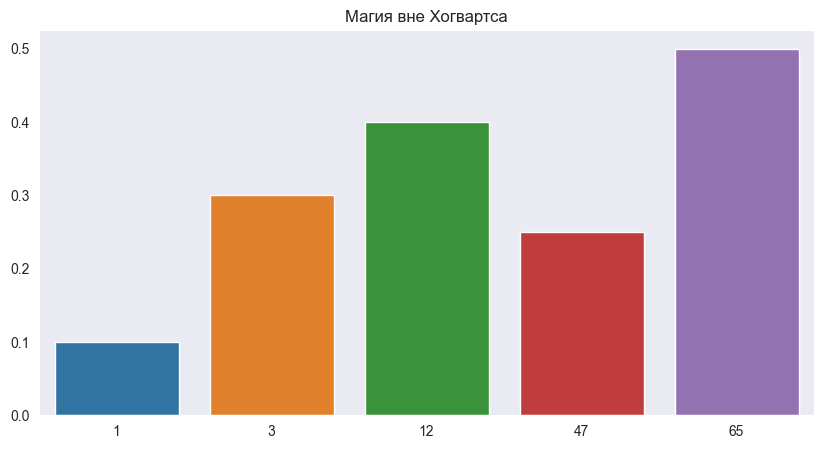

Дециль ( 0.1 ) =  1.8
Квартиль ( 0.25 ) =  3.0
Дециль ( 0.3 ) =  4.8
Дециль ( 0.4 ) =  8.4
Медиана ( 0.5 ) =  12.0
Дециль ( 0.6 ) =  25.999999999999996
Квартиль ( 0.75 ) =  47.0
Дециль ( 0.9 ) =  57.800000000000004


In [8]:
statistical_analysis(r, q)

In [9]:
### Задача 2

#Постройте в Python функцию ***test_calc***, которая будет проводить t-тест на равенство средних двух выборок. 

#**На вход она берет:**

#- Ряд 1 (***r1***)
#- Ряд 2 (***r2***)
#- Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)

#**И делает следующие шаги:**

#1. Вычисляет значение *t-критерия* и его *p_value* по сравнению средних значений рядов ***r1*** и ***r2.*** 
#Лучше всего воспользоваться функцией *ttest_ind* из библиотеки *scipy.stats.* Эти значения сохраняются 
#во внутренние переменные (значение t-критерия в переменную ***s,*** p_value в переменную ***p***).
#2. Возвращает (*return*) переменные ***s*** и ***p***.
#3. Оформляет принт результатов, принимается ли нулевая гипотеза о равенстве средних или нет 
#на основании сравнения полученного *p_value* (переменная ***р***) и аргумента ***alpha.***

In [10]:
from scipy import stats as st
from scipy.stats import ttest_ind  #загружаем титест

In [11]:
r1 = df [ df ['id_group'] == 'control']  #создаем новую таблицу r1 
#r2 = df [ df ['id_group'] == 'test'] ['sum_pay']
r2 = df [ df ['id_group'] == 'test'] 


In [12]:
r1, r2

(       id_client id_group  sum_pay  id_point  months_reg
 1        1390221  control   1267.0    1182.0          11
 2        1363404  control   4259.0    1178.0           2
 4        1360376  control    760.0    1178.0          14
 7        1373231  control   4008.0    1179.0           0
 9        1373288  control   4109.0    1179.0           8
 ...          ...      ...      ...       ...         ...
 10966    1391333  control   2704.0    1182.0           5
 10969    1389984  control   1818.0    1182.0           2
 10970    1362847  control   2055.0    1178.0           4
 10971    1359021  control    799.0    1178.0           3
 10972    1363347  control   4825.0    1178.0           6
 
 [5202 rows x 5 columns],
        id_client id_group  sum_pay  id_point  months_reg
 0        1420218     test   3288.0    1199.0           8
 3        1370042     test   7211.0    1179.0           3
 5        1371160     test    218.0    1179.0           5
 6        1372110     test   1295.0    1179.

In [13]:
def test_calc(r1, r2, alpha = 0.05):
        s, p = ttest_ind ( r1 ['sum_pay'], r2  ['sum_pay'] ) #считаем стат.параметры в двух группах по сумме оплат         
        if p < alpha:
              print ('Средние значения в выборках равны')
        else: print('Средние значения в выборках НЕ равны')
               
        return s, p
        

In [14]:
 s, p = test_calc(r1, r2)    

Средние значения в выборках НЕ равны


In [15]:
### Задача 3

#Постройте в Python функцию **mann_whitney_func**, которая будет проводить тест Манна-Уитни для двух выборок.

#**На вход она берет:**

#- Ряд 1 (***r1***)
#- Ряд 2 (***r2***)
#- Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)

#**И делает следующие шаги:**

#1. Вычисляет значение статистики Манна — Уитни и p_value нулевой гипотезы теста Манна-Уитни. 
#Значение статистики записывается во внутреннюю переменную ***s***, а *p_value* - во внутреннюю переменную ***p***.
#2. Принт результата в зависимости от соотношения p_value и alpha («Распределения (не) равны»).
#3. Возвращает (в *return*) — внутренние переменные ***s*** и ***p***.

In [16]:
def mann_whitney_func (r1,r2, alpha = 0.05):
        s, p = st.mannwhitneyu (x, y)
    
        if p < alpha:
            print ('Распределения НЕ равны')
        else: print ('Распределение равны')
    
        return s, p
    

In [17]:
s, p = test_calc(r1, r2)

Средние значения в выборках НЕ равны


In [21]:
fs = (14,7) ### размер графиков

iq = [0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]

iq_names = ['1ый дециль (10%) ........ >>>',
            '1ый квартиль (25%) ...... >>>',
            '3ий дециль (30%) ........ >>>',
            '4ый дециль (40%) ........ >>>',
            'Медиана (50%) ........... >>>',
            '6ой дециль (60%) ........ >>>',
            '3ий квартиль (75%) ...... >>>',
            '9ый дециль (90%) ........ >>>']

st_names = ['Среднее значение ........ >>>',
            'Дисперсия ............... >>>',
            'Стандартное отклонение .. >>>']

dct = dict()
dct['types'] = [list, tuple]
dct['length'] = 4
dct['numeric'] = [int, float]

def show_hist(r1, r2, graph_title = '', xlabel = 'Размер платежа', ylabel = 'Кол-во людей'):

    for r in r1, r2:
        if type(r) not in dct['types']:
            return print("Нужен список или кортеж!")
        if len(r) <= dct['length']:
            return print("Требуется более длинный ряд!")
        for each in range(len(r)):
            if type(r[each]) not in dct['numeric']:
                return print('Ты должен был бороться со злом, а не примкнуть к нему!')

    import re
    import traceback

    stack = traceback.extract_stack()
    arg_name = re.sub('show_hist\((.*)\)', '\g<1>', stack[-2][-1])
    arg_list = arg_name.split(',')

    plt.figure(figsize=fs)
    plt.title(graph_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.histplot(r1, color='r', alpha=0.65, binwidth=200, binrange=[0,11000], label = arg_list[0].strip())
    sns.histplot(r2, color='g', alpha=0.35, binwidth=200, binrange=[0,11000], label = arg_list[1].strip())
    plt.axvline(pd.Series(r1).mean(), color='r', linestyle='--', linewidth=2, label = 'среднее '+arg_list[0].strip())
    plt.axvline(pd.Series(r2).mean(), color='g', linestyle='--', linewidth=2, label = 'среднее '+arg_list[1].strip())
    plt.legend()
    plt.show()

In [22]:
show_hist(r1, r2)

Нужен список или кортеж!


<AxesSubplot: >

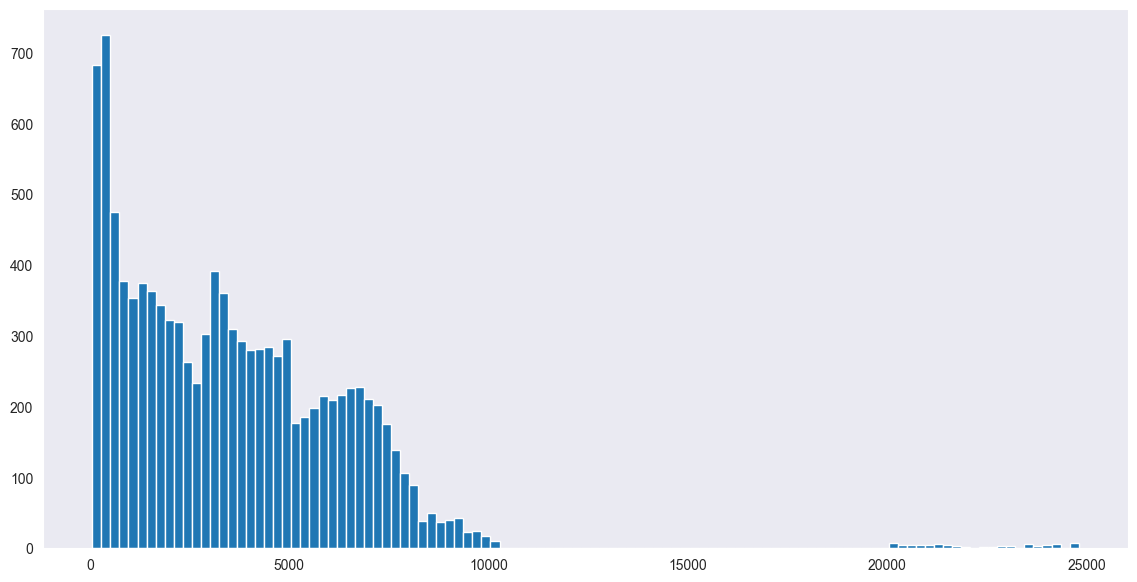

In [25]:
df.sum_pay.hist(figsize=(14,7), bins=len(df.sum_pay)//100, grid=False)

In [26]:
import sketch

In [31]:
df.sketch.howto("plot histogram on sum_pay column with 100 bins, no grid and 14*7 figure size")

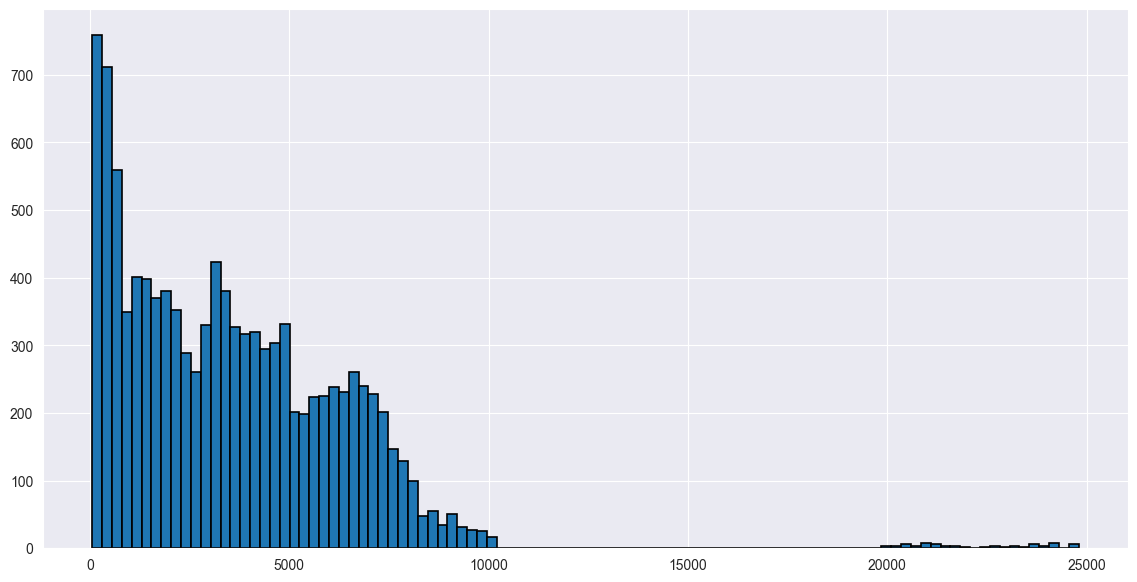

In [32]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14,7))

# Plot histogram with 100 bins and no grid
plt.hist(df['sum_pay'], bins=100, edgecolor='black', linewidth=1.2)

# Show plot
plt.show()